### Importing Relevant Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [8]:
wn = np.random.normal(loc= df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [9]:
df['wn'] = wn

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.227450
std,292.559287,292.732229
min,438.920000,60.184873
25%,914.620000,891.297412
50%,1144.650000,1091.504815
75%,1316.280729,1279.023883
max,1570.252238,2071.658049


Text(0.5, 1.0, 'white noise')

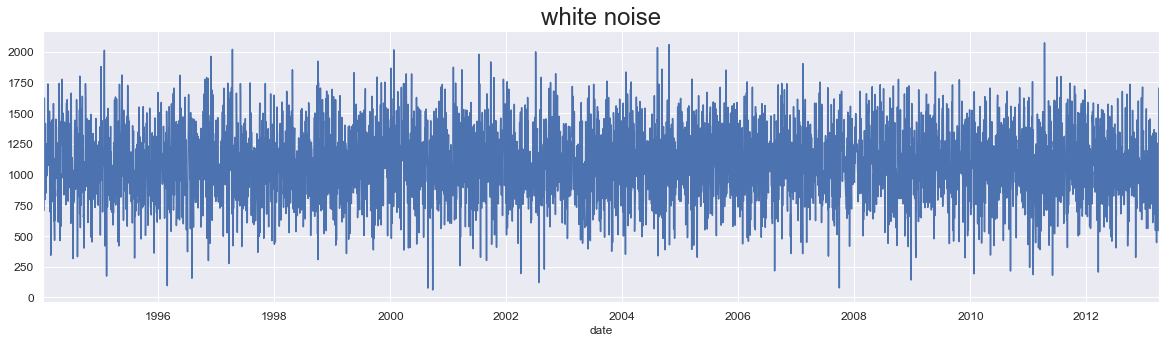

In [15]:
df.wn.plot(title='white noise', figsize = (20,5), fontsize = 12)
plt.title('white noise', size=24)

(0, 2300)

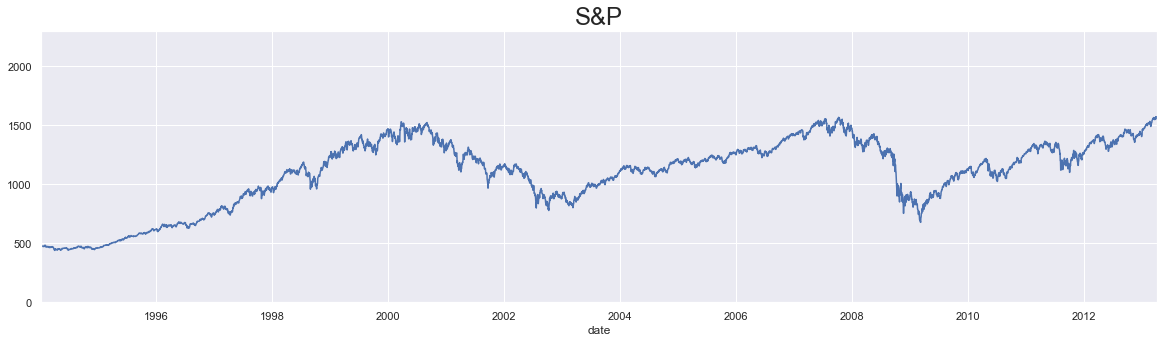

In [18]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P', size = 24)
plt.ylim(0, 2300)


### Random Walk

In [21]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)

In [22]:
rw = rw.asfreq('b')


In [23]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [25]:
df['rw'] = rw.price


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1185.260916,1122.139662
1994-01-10,475.27,704.223961,1080.347860
1994-01-11,474.13,1114.700313,1082.095245
1994-01-12,474.17,1073.120118,1083.639265
1994-01-13,472.47,1622.340546,1067.146255


Text(0.5, 1.0, 'random walk vs S&P')

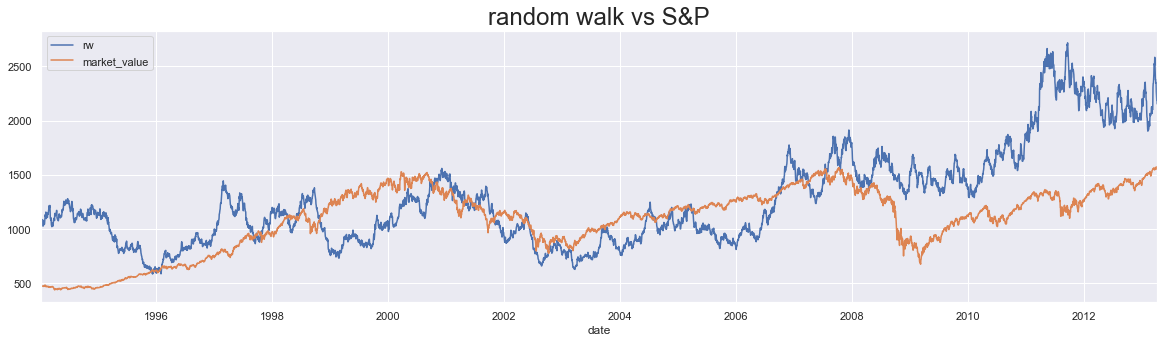

In [30]:
df.rw.plot(figsize=(20,5), legend = True)
df.market_value.plot(legend = True)
plt.title('random walk vs S&P', size=24)

### Stationarity

In [31]:
sts.adfuller(df.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [32]:
sts.adfuller(df.wn)

(-71.12447425819217,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70822.51268110269)

In [33]:
sts.adfuller(df.rw)

(-1.3286073927689703,
 0.6159849181617391,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

### ACF

### PACF